In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
RUTA = "/content/drive/MyDrive/NLP"

In [4]:
path_csv = "/content/drive/MyDrive/NLP/results_test.csv"
df = pd.read_csv(path_csv, sep=';', decimal='.')

In [5]:
df.head()

,Unnamed: 0,accuracy,precision,recall,f1
0,GradientBoost,0.698031,0.699024,0.698031,0.685312
1,DeepLearning,0.702407,0.707383,0.702407,0.686821
2,EncoderLSTM,0.580963,0.337518,0.580963,0.426978


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Model      3 non-null      object 
 1   accuracy   3 non-null      float64
 2   precision  3 non-null      float64
 3   recall     3 non-null      float64
 4   f1         3 non-null      float64
dtypes: float64(4), object(1)
memory usage: 248.0+ bytes


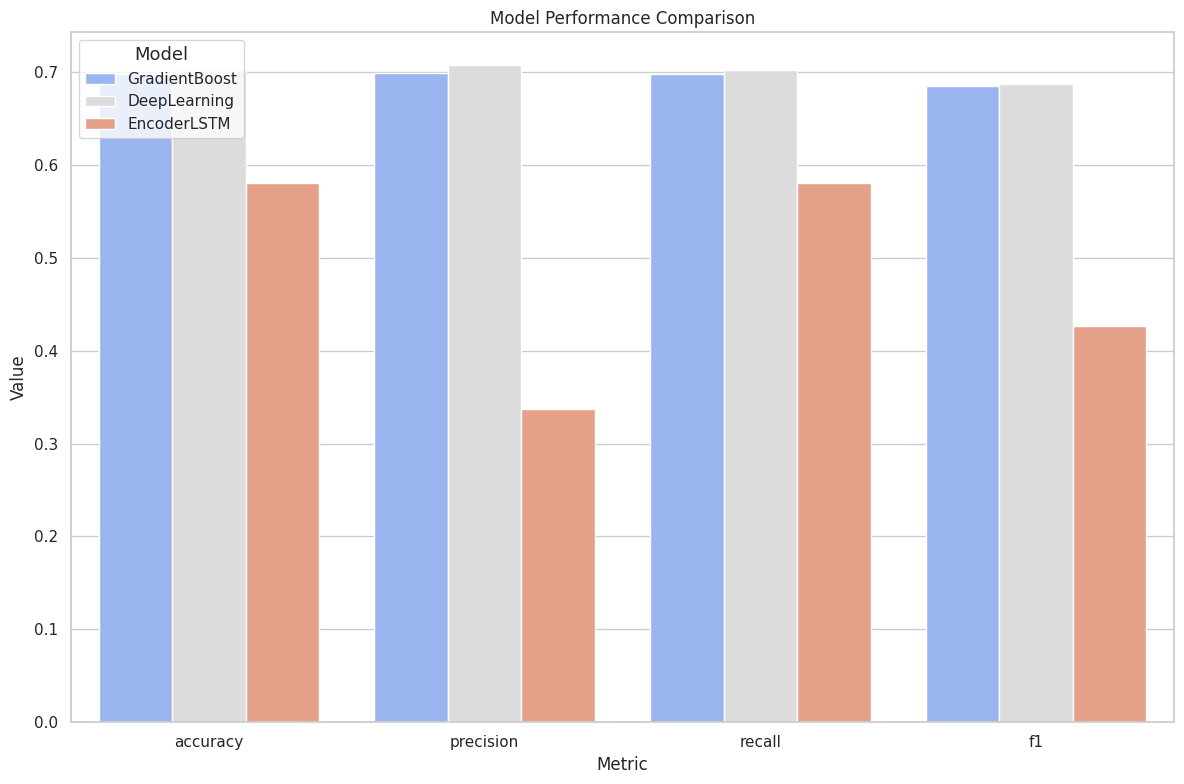

In [17]:
df_long = pd.melt(df, id_vars='Model', value_vars=['accuracy', 'precision', 'recall', 'f1'],
                  var_name='Metric', value_name='Value')

# Crear el gráfico
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Crear un gráfico de barras agrupadas
barplot = sns.barplot(data=df_long, x='Metric', y='Value', hue='Model', palette="coolwarm")

# Mejorar la visualización
plt.title('Model Performance Comparison')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.legend(title='Model', title_fontsize='13', loc='upper left')

plt.tight_layout()
plt.show()

## Conclusiones del Análisis Comparativo de Modelos de NLP para Análisis de Sentimiento

La evaluación de tres enfoques distintos de modelado en la tarea de análisis de sentimiento ha revelado insights valiosos:

- **DeepLearning**: Este modelo mostró una ligera ventaja en términos de **precisión** y **recall** comparado con GradientBoost, lo que puede indicar una mayor habilidad para clasificar correctamente las opiniones positivas y negativas y, a su vez, una mejor generalización a nuevos datos. Sin embargo, el incremento en estas métricas no se reflejó proporcionalmente en la puntuación F1, sugiriendo que las mejoras en la clasificación no son uniformemente distribuidas entre las clases.

- **GradientBoost**: Aunque competente en precisión, la discrepancia entre precisión y recall podría implicar una tendencia a favor de una clase, potencialmente la clase negativa, lo cual es una consideración importante en aplicaciones de análisis de sentimiento donde el balance entre clases es crítico.

- **EncoderLSTM**: Este modelo presentó un desempeño inferior en todas las métricas, lo que plantea preguntas sobre su configuración para el procesamiento de secuencias de texto en este problema particular. La arquitectura LSTM podría requerir más ajuste o datos adicionales para capturar la complejidad de la sentimentalidad en el lenguaje natural.

Estos resultados subrayan la importancia de elegir y ajustar modelos que no solo se desempeñen bien en métricas estándar sino que también muestren un balance entre la detección de diferentes polaridades de sentimiento. La precisión en la identificación de sentimientos positivos y negativos es fundamental para obtener un análisis de sentimiento fiable y útil.
